In [57]:
# Import Dataframe and Processing Libraries
import pandas as pd
from collections import Counter

# Import Data Visulisation Libraries
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

plt.style.use('ggplot')

# set jupyter's max row display
pd.set_option('display.max_row', 1000)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

In [58]:
# Read and import csv as dataframe
data = pd.read_csv("C:/Users/James Stuart-Smith/PycharmProjects/nlp-web-scrapping/data/actual/cleanedData.csv")
data.head()

user                                 message_id  \
0              babybounce              /babybounce/message/226382374   
1              L1_Trading              /L1_Trading/message/226381562   
2           Economist4401           /Economist4401/message/226381511   
3                OkieOkie                /OkieOkie/message/226381256   
4  risksavage_inthemarket  /risksavage_inthemarket/message/226381105   

  sentiment                                            content        date  \
0   Bullish  $BA travel going green bullish $CCL $RCL $NCLH...  09/07/2020   
1   Bullish                        $SPY let’s go mooning today  09/07/2020   
2   Bearish  $SPY $SPX $DJIA $DIA $QQQ Analysts on US stock...  09/07/2020   
3   Bearish  $SPY more China. China wants some of Australia...  09/07/2020   
4   Bullish  $GNLN $CGC $SPY $KERN $PM “What Does The Insti...  09/07/2020   

       time                                 securities  \
0  12:21:03   ['$BA', '$CCL', '$RCL', '$NCLH', '$SPY']   
1  12:21:03                                   ['$SPY']   
2  12:21:03  ['$SPY', '$SPX', '$DJIA', '$DIA', '$QQQ']   
3  12:21:03                                   ['$SPY']   
4  12:21:03  ['$GNLN', '$CGC', '$SPY', '$KERN', '$PM']   

                                          tweet text  \
0                         travel going green bullish   
1                             let’s go mooning today   
2  Analysts on US stock markets: 1. On Monday, Bl...   
3  more China. China wants some of Australia lol🦘🦘🦘🦘   
4  “What Does The Institutional Ownership Tell Us...   

                                              tokens  num_of_tokens  \
0            ['travel', 'going', 'green', 'bullish']              4   
1                  ['let', 'go', 'mooning', 'today']              4   
2  ['analysts', 'us', 'stock', 'markets', 'monday...             58   
3    ['china', 'china', 'wants', 'australia', 'lol']              8   
4  ['institutional', 'ownership', 'tell', 'us', '...             80   

                          tokens_in_transformed_text  \
0               ['travel', 'go', 'green', 'bullish']   
1                     ['let', 'go', 'moon', 'today']   
2  ['analyst', 'us', 'stock', 'market', 'monday',...   
3     ['china', 'china', 'want', 'australia', 'lol']   
4  ['institutional', 'ownership', 'tell', 'us', '...   

   num_of_tokens_in_transformed_text  
0                                  4  
1                                  4  
2                                 37  
3                                  5  
4                                 45

In [59]:
# Create two boolean tables for bullish and bearish
bullish_tweet_class =  data['sentiment']=='Bullish'

bearish_tweet_class =  data['sentiment']=='Bearish'
bearish_tweet_class.head()

0    False
1    False
2     True
3     True
4    False
Name: sentiment, dtype: bool

In [60]:
# Create two seperate tables for bullish and bearish data
bullish_data = data[bullish_tweet_class]

bearish_data = data[bearish_tweet_class]
bearish_data.head()

user                                 message_id  \
2            Economist4401           /Economist4401/message/226381511   
3                 OkieOkie                /OkieOkie/message/226381256   
7              DannETrader             /DannETrader/message/226380472   
12  risksavage_inthemarket  /risksavage_inthemarket/message/226382588   
15             ihavespoken             /ihavespoken/message/226383179   

   sentiment                                            content        date  \
2    Bearish  $SPY $SPX $DJIA $DIA $QQQ Analysts on US stock...  09/07/2020   
3    Bearish  $SPY more China. China wants some of Australia...  09/07/2020   
7    Bearish  $SPY yesterday was last day of FED repo’s. It ...  09/07/2020   
12   Bearish  $SPY $TSLA $BA $JPM $ZM GRAB A NOTEPAD!!! \r\n...  09/07/2020   
15   Bearish                $SPY 900 point drop in crude coming  09/07/2020   

        time                                 securities  \
2   12:21:03  ['$SPY', '$SPX', '$DJIA', '$DIA', '$QQQ']   
3   12:21:03                                   ['$SPY']   
7   12:21:03                                   ['$SPY']   
12  12:21:34    ['$SPY', '$TSLA', '$BA', '$JPM', '$ZM']   
15  12:25:38                                   ['$SPY']   

                                           tweet text  \
2   Analysts on US stock markets: 1. On Monday, Bl...   
3   more China. China wants some of Australia lol🦘🦘🦘🦘   
7   yesterday was last day of FED repo’s. It isn’t...   
12  GRAB A NOTEPAD!!! Investing101 FB@risksavagema...   
15                     900 point drop in crude coming   

                                               tokens  num_of_tokens  \
2   ['analysts', 'us', 'stock', 'markets', 'monday...             58   
3     ['china', 'china', 'wants', 'australia', 'lol']              8   
7   ['yesterday', 'last', 'day', 'fed', 'repo', 'i...             12   
12  ['grab', 'notepad', 'investing101', 'fb', 'wat...              8   
15                  ['point', 'drop', 'crude', 'ing']              5   

                           tokens_in_transformed_text  \
2   ['analyst', 'us', 'stock', 'market', 'monday',...   
3      ['china', 'china', 'want', 'australia', 'lol']   
7   ['yesterday', 'last', 'day', 'feed', 'repo', '...   
12  ['grab', 'notepad', 'investing101', 'fb', 'wat...   
15                  ['point', 'drop', 'crude', 'ing']   

    num_of_tokens_in_transformed_text  
2                                  37  
3                                   5  
7                                   8  
12                                  8  
15                                  4

In [61]:
# count occurences of words of value
bullish_words = [word for tweet in bullish_data['tokens_in_transformed_text'] for word in tweet.replace(",", "").replace("[", "").replace("]", "").replace("'", "").split(' ')]
bullish_word_count = Counter(bullish_words)

bearish_words = [word for tweet in bearish_data['tokens_in_transformed_text'] for word in tweet.replace(",", "").replace("[", "").replace("]", "").replace("'", "").split(' ')]
bearish_word_count = Counter(bearish_words)

In [62]:
# ------------------- Convert lists into dataframes --------------------------------------
df_bullish = pd.DataFrame(bullish_word_count.items(), columns=["Word", "Bullish Occurences"])

df_bearish = pd.DataFrame(bearish_word_count.items(), columns=["Word", "Bearish Occurences"])
df_bearish.head()

Word  Bearish Occurences
0  analyst                  26
1       us                 253
2    stock                 427
3   market                 951
4   monday                 113

In [63]:
# Join the tables
results = df_bullish.merge(df_bearish, how= 'outer', on= 'Word')
results.head()

Word  Bullish Occurences  Bearish Occurences
0   travel                15.0                13.0
1       go              1161.0               941.0
2    green               345.0               143.0
3  bullish               348.0               115.0
4      let               356.0               238.0

In [64]:
# Add total column
total_column = results['Bullish Occurences'].fillna(0) + results['Bearish Occurences'].fillna(0)
results['Total'] = total_column
results

Word  Bullish Occurences  Bearish Occurences   Total
0           travel                15.0                13.0    28.0
1               go              1161.0               941.0  2102.0
2            green               345.0               143.0   488.0
3          bullish               348.0               115.0   463.0
4              let               356.0               238.0   594.0
...            ...                 ...                 ...     ...
12303       rekted                 NaN                 2.0     2.0
12304  replication                 NaN                 1.0     1.0
12305     aeroflot                 NaN                 1.0     1.0
12306        droop                 NaN                 1.0     1.0
12307   obligatory                 NaN                 1.0     1.0

[12308 rows x 4 columns]

In [65]:
# Creating Percentage Bullish to Bearish Columns
bullish_percentages = (results['Bullish Occurences'].fillna(0) / results['Total'])
bearish_percentages = (results['Bearish Occurences'].fillna(0) / results['Total'])

results.insert(2, "Bullish Percentages", bullish_percentages)
results.insert(4, "Bearish Percentages", bearish_percentages)

In [66]:
# Export Table to Excel (If needed)
results.to_csv(r"C:/Users/James Stuart-Smith/PycharmProjects/nlp-web-scrapping/data/actual/wordCount.csv", index = True)

In [67]:
# Sort by total column and find top 15
results = results.sort_values(by='Total', ascending= False)
results1 = results.head(15)
results1

Word  Bullish Occurences  Bullish Percentages  Bearish Occurences  \
1        go              1161.0             0.552331               941.0   
80      not               822.0             0.446254              1020.0   
20   market               792.0             0.454389               951.0   
46      get               885.0             0.538321               759.0   
53     bear              1287.0             0.852318               223.0   
109     buy               790.0             0.649671               426.0   
60      day               704.0             0.614847               441.0   
33    stock               652.0             0.604263               427.0   
337    week               540.0             0.556128               431.0   
38     like               503.0             0.528361               449.0   
151    bull               309.0             0.331901               622.0   
62     time               504.0             0.547231               417.0   
27      see               460.0             0.533643               402.0   
6     today               498.0             0.592857               342.0   
37     look               476.0             0.570060               359.0   

     Bearish Percentages   Total  
1               0.447669  2102.0  
80              0.553746  1842.0  
20              0.545611  1743.0  
46              0.461679  1644.0  
53              0.147682  1510.0  
109             0.350329  1216.0  
60              0.385153  1145.0  
33              0.395737  1079.0  
337             0.443872   971.0  
38              0.471639   952.0  
151             0.668099   931.0  
62              0.452769   921.0  
27              0.466357   862.0  
6               0.407143   840.0  
37              0.429940   835.0

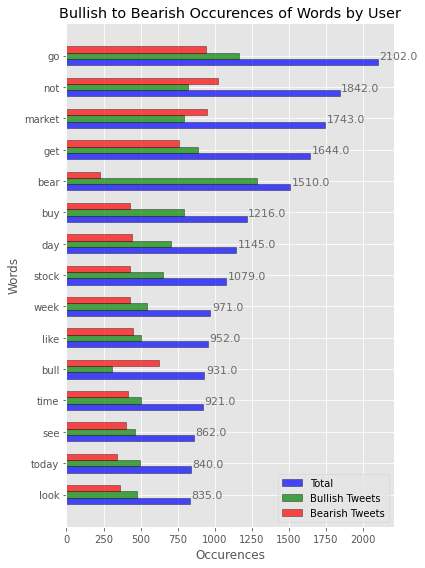

In [68]:
# Create Bar Chart of user and occurences
y_word = results1['Word'].tolist()
y_word.reverse()

y_indexes = np.arange(len(y_word))
height = 0.2

x_bull = results1['Bullish Occurences'].tolist()
x_bear = results1['Bearish Occurences'].tolist()
x_total = results1['Total'].tolist()

x_bull.reverse()
x_bear.reverse()
x_total.reverse()

plt.figure(figsize=(6,8))

multi = plt.subplot()
rects1 = multi.barh(y_indexes - height, x_total, height = height, edgecolor='black',  color = 'blue', alpha = 0.7, label = 'Total')
rects2 = multi.barh(y_indexes, x_bull, height = height, edgecolor='black', color = 'green', alpha = 0.7, label = 'Bullish Tweets')
rects3 = multi.barh(y_indexes + height, x_bear, height = height, edgecolor='black' , color = 'red', alpha = 0.7, label = 'Bearish Tweets')

plt.xlabel('Occurences')
plt.ylabel('Words')
plt.yticks(ticks = y_indexes, labels = y_word)
plt.title('Bullish to Bearish Occurences of Words by User')

# set individual bar lables using above list
for i in rects1:
    # get_width pulls left or right; get_y pushes up or down
    plt.text(i.get_width() + 10, i.get_y() + .18, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

plt.legend()
plt.tight_layout()
plt.show()

In [69]:
# Restrict total amount of values
results = results.sort_values(by='Total', ascending= False)
results2 = results
results2

Word  Bullish Occurences  Bullish Percentages  \
1              go              1161.0             0.552331   
80            not               822.0             0.446254   
20         market               792.0             0.454389   
46            get               885.0             0.538321   
53           bear              1287.0             0.852318   
...           ...                 ...                  ...   
10233    prophecy                 NaN             0.000000   
10234       covit                 NaN             0.000000   
10235     cooking                 NaN             0.000000   
10236         nas                 NaN             0.000000   
12307  obligatory                 NaN             0.000000   

       Bearish Occurences  Bearish Percentages   Total  
1                   941.0             0.447669  2102.0  
80                 1020.0             0.553746  1842.0  
20                  951.0             0.545611  1743.0  
46                  759.0             0.461679  1644.0  
53                  223.0             0.147682  1510.0  
...                   ...                  ...     ...  
10233                 1.0             1.000000     1.0  
10234                 1.0             1.000000     1.0  
10235                 1.0             1.000000     1.0  
10236                 1.0             1.000000     1.0  
12307                 1.0             1.000000     1.0  

[12308 rows x 6 columns]

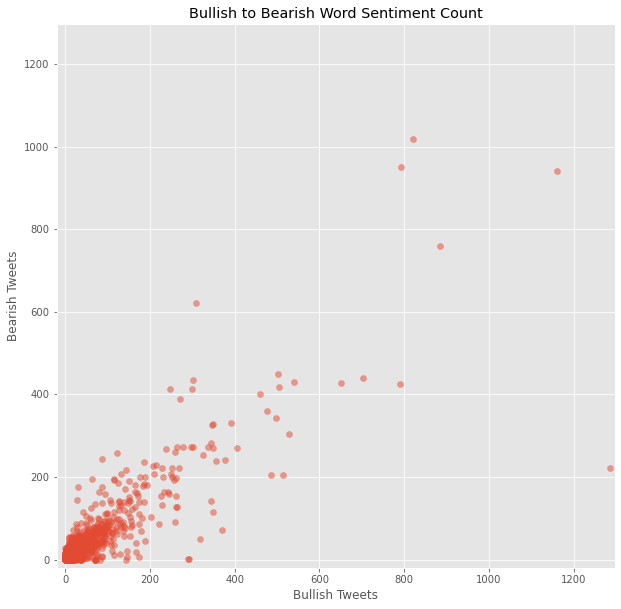

In [70]:
# Plot the Scatter Graph
results = results.fillna(0)
x_bull = results['Bullish Occurences'].tolist()
y_bear = results['Bearish Occurences'].tolist()

plt.figure(figsize=(10,10))

plt.title('Bullish to Bearish Word Sentiment Count')
plt.xlabel('Bullish Tweets')
plt.ylabel('Bearish Tweets')

plt.scatter(x_bull, y_bear, alpha = 0.5)

# Find maximum plot value of bullish or bearish tweets
if max(x_bull) >= max(y_bear):
    plt.xlim(-20, max(x_bull) + 10)
    plt.ylim(-20, max(x_bull) + 10)
else:
    plt.xlim(-20, max(y_bear) + 10)
    plt.ylim(-20, max(y_bear) + 10)

plt.show()

In [71]:
#filtering tweets for 20 + tweets by word and over 80% lean towards bullish or Bearish
results_filtered = results['Total'] >= 20
results3 = results[results_filtered]

high_bullish = results3['Bullish Percentages'] >= 0.8
results31 = results3[high_bullish]

high_bearish = results3['Bearish Percentages'] >= 0.8
results32 = results3[high_bearish]

results_filtered = pd.concat([results31, results32])
results_filtered.head()

Word  Bullish Occurences  Bullish Percentages  Bearish Occurences  \
53     bear              1287.0             0.852318               223.0   
64  trading               370.0             0.839002                71.0   
71   option               319.0             0.866848                49.0   
73   invite               293.0             0.993220                 2.0   
72  discord               290.0             0.996564                 1.0   

    Bearish Percentages   Total  
53             0.147682  1510.0  
64             0.160998   441.0  
71             0.133152   368.0  
73             0.006780   295.0  
72             0.003436   291.0

In [72]:
results_filtered = results_filtered.sort_values(by='Total', ascending= False)
results4 = results_filtered.head(15)

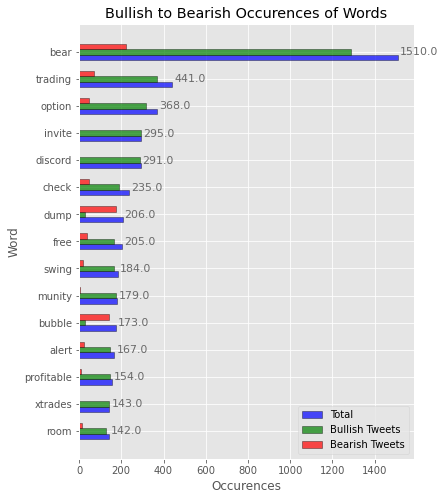

In [73]:
# Create Filtered Bar Chart
y_word = results4['Word'].tolist()
y_word.reverse()

y_indexes = np.arange(len(y_word))
height = 0.2

x_bull = results4['Bullish Occurences'].tolist()
x_bear = results4['Bearish Occurences'].tolist()
x_total = results4['Total'].tolist()

x_bull.reverse()
x_bear.reverse()
x_total.reverse()

plt.figure(figsize=(6,8))

multi = plt.subplot()
rects1 = multi.barh(y_indexes - height, x_total, height = height, edgecolor='black',  color = 'blue', alpha = 0.7, label = 'Total')
rects2 = multi.barh(y_indexes, x_bull, height = height, edgecolor='black', color = 'green', alpha = 0.7, label = 'Bullish Tweets')
rects3 = multi.barh(y_indexes + height, x_bear, height = height, edgecolor='black' , color = 'red', alpha = 0.7, label = 'Bearish Tweets')

plt.xlabel('Occurences')
plt.ylabel('Word')
plt.yticks(ticks = y_indexes, labels = y_word)
plt.title('Bullish to Bearish Occurences of Words')

# set individual bar lables using above list
for i in rects1:
    # get_width pulls left or right; get_y pushes up or down
    plt.text(i.get_width() + 10, i.get_y() + .18, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

plt.legend()
plt.show()

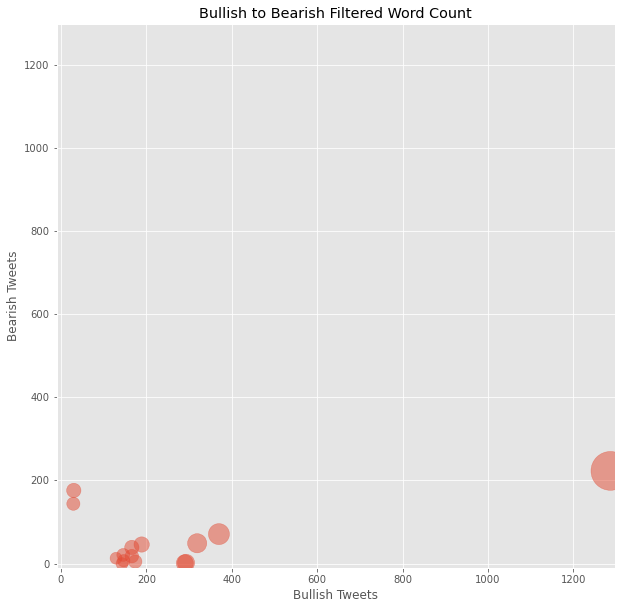

In [74]:
# Plot the Scatter Graph
results4 = results4.fillna(0)
x_bull = results4['Bullish Occurences'].tolist()
y_bear = results4['Bearish Occurences'].tolist()
s_total = results4['Total'].tolist()

plt.figure(figsize=(10,10))

plt.title('Bullish to Bearish Filtered Word Count')
plt.xlabel('Bullish Tweets')
plt.ylabel('Bearish Tweets')

plt.scatter(x_bull, y_bear, s = s_total, alpha = 0.5)

# Find maximum plot value of bullish or bearish tweets
if max(x_bull) >= max(y_bear):
    plt.xlim(-10, max(x_bull) + 10)
    plt.ylim(-10, max(x_bull) + 10)
else:
    plt.xlim(-10, max(y_bear) + 10)
    plt.ylim(-10, max(y_bear) + 10)

plt.show()

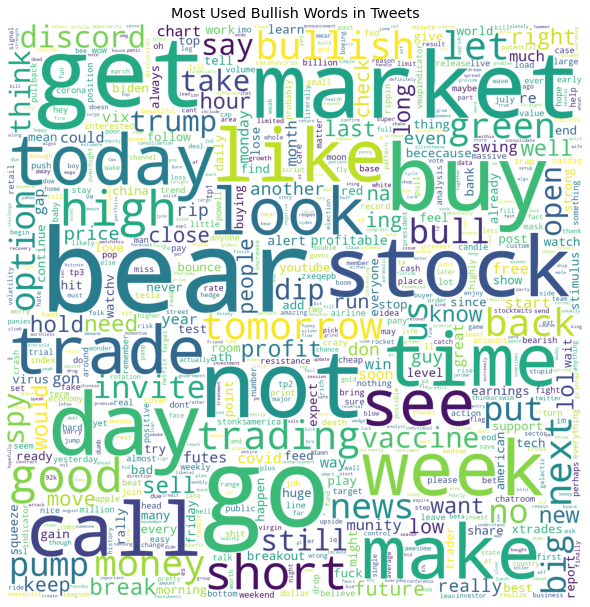

In [107]:
# Bullish Word Cloud
word_freq = results.set_index('Word')['Bullish Occurences'].to_dict()

wordcloud = WordCloud(width = 1500, 
                height = 1500, 
                background_color ='white',
                max_words = 800,
                max_font_size = 300, 
                min_font_size = 10).generate(str(results['Word'])) 

wordcloud.generate_from_frequencies(word_freq)
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('Most Used Bullish Words in Tweets')
  
plt.show() 

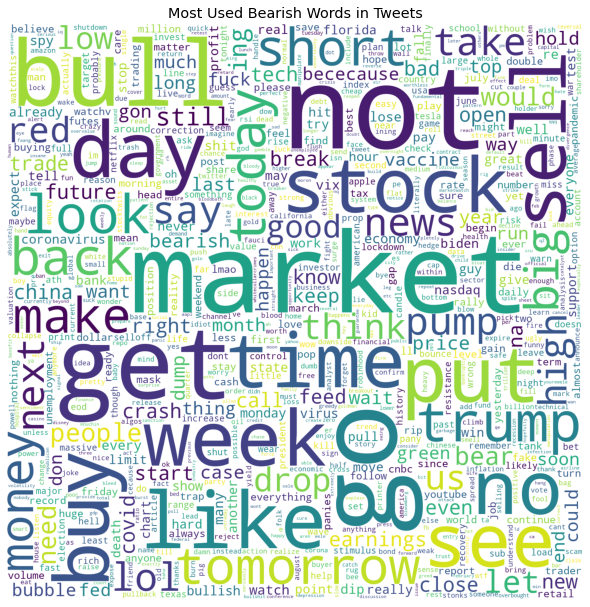

In [106]:
# Bearish Word Cloud
word_freq = results.set_index('Word')['Bearish Occurences'].to_dict()

wordcloud = WordCloud(width = 1500, 
                height = 1500, 
                background_color ='white',
                max_words = 800,
                max_font_size = 300, 
                min_font_size = 10).generate(str(results['Word'])) 

wordcloud.generate_from_frequencies(word_freq)
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('Most Used Bearish Words in Tweets')
  
plt.show() 